<a href="https://colab.research.google.com/github/ahmetmihca/coinshistory/blob/main/coinshistory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DogeCoin, Ethereum, Bitcoin Historical Time Series Corresponding to the Elon Musk's Tweets**



**Project** **Description**

This project aims to use machine learning algorithms to predict the values of Dogecoin, Bitcoin, and Ethereum based on specific attributes. Such predictions would be valuable to investors considering investing, as they can use them to decide whether or not to invest efficiently.

The main focus of this project is understanding the factors that affect the value of Dogecoin. To this end, we will compare the values of Dogecoin, Bitcoin, and Ethereum to determine if there is any correlation between them. In addition, we will investigate Elon Musk's tweets' role in the value of Dogecoin. Specifically, we will analyze the changes in Dogecoin's value after Musk tweets about it using a classification tree method. As the dataset covers an extended period, we will also be able to examine how the effect of tweets changes over time through exploratory data analysis, statistical analysis, and hypothesis testing.

**Utilized Datasets**


*The main datasets are,*

**1.   DOGE-USD Historical Records:** *https://www.kaggle.com/dhruvildave/*
dataset contains its historical stock price in USD on a daily frequency starting from 17 September 2014 and has 6 variables which are called 'Date', 'Open', 'High', 'Low', 'Close' and 'Volume'.                    


**2.   ETH-USD Historical Records:** *https://www.kaggle.com/varpit94/ethereum-data* dataset provides the history of daily prices of Ethereum. The data starts from 07-Aug-2015 and has 7 variables which are called 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close'and 'Volume'. 'Adj Close' is dropped in this study to create similar variables in other datasets.

**3.   BTC-USD Historical Records:** *https://www.kaggle.com/varpit94/bitcoin-data-updated-till-26jun2021* dataset contains 12.3k observations and 39 columns in raw dataset. However, some columns are going to be dropped according to the progress of the project.  

**4.   Elon Musk's Tweets from 2010 to 2022:** *https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021?select=2021.csv* dataset provides the history of daily prices of Bitcoin. The data starts from 17-Sep-2014 and has 7 variables which are called 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close'and 'Volume'. 'Adj Close' is dropped in this study to create similar variables in other datasets.


**To facilitate the analysis of data sets, observations interval is taken between 7 August 2015 - 5 March 2022**

***Descriptions of Variables in Coins Datasets***         

**Open** - Price from the first transaction of a trading day

**High** - Maximum price in a trading day

**Low** - Minimum price in a trading day 

**Close** - Price from the last transaction of a trading day                    

**Adj Close** - Closing price adjusted to reflect the value after accounting for any corporate actions 
                                                      
**Volume** - Number of units traded in a day


# Data Exploration

Importing frequently used libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
from os.path import join
import re
from google.colab import drive


In [8]:
path_prefix = './drive/My Drive/Datasets'

## Cleaning DOGE-USD





In [11]:
fname = 'DOGE-USD.csv'
df = pd.read_csv(fname)
df = df[(df['Date'] >= '2015-08-07') & (df['Date'] <= '2021-03-22')] # obtain date in specific range
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-08-07,0.000168,0.000172,0.000165,0.000168,100492.0
2015-08-08,0.000169,0.000171,0.000158,0.000158,145228.0
2015-08-09,0.000158,0.000163,0.000156,0.000162,106400.0
2015-08-10,0.000162,0.000164,0.000158,0.000160,68112.0
2015-08-11,0.000160,0.000164,0.000160,0.000164,121884.0


In [12]:

# removing Nan values from DOGE-USD.csv
new_dataDOGE = df.dropna(axis = 0, how ='any') 
print("The shape before removal:", df.shape)
print("The shape after removal:", new_dataDOGE.shape)


The shape before removal: (2055, 5)
The shape after removal: (2051, 5)


In [13]:
averagePrice = (new_dataDOGE['High']+new_dataDOGE['Low'])/2    #average price for dogecoin
new_dataDOGE['Average Price'] = averagePrice
new_dataDOGE.head()

<ipython-input-13-80118b0f7817>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataDOGE['Average Price'] = averagePrice


,Open,High,Low,Close,Volume,Average Price
Date,,,,,,
2015-08-07,0.000168,0.000172,0.000165,0.000168,100492.0,0.000169
2015-08-08,0.000169,0.000171,0.000158,0.000158,145228.0,0.000164
2015-08-09,0.000158,0.000163,0.000156,0.000162,106400.0,0.000160
2015-08-10,0.000162,0.000164,0.000158,0.000160,68112.0,0.000161
2015-08-11,0.000160,0.000164,0.000160,0.000164,121884.0,0.000162


## Cleaning ETH-USD


In [14]:
fname = 'ETH-USD.csv'
dfETH = pd.read_csv(fname)
dfETH = dfETH[(dfETH['Date'] >= '2015-08-07') & (dfETH['Date'] <= '2021-03-22')] # obtain date in specific range
dfETH.set_index('Date',inplace=True)
dfETH.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [15]:
# removing Nan values from ETH-USD.csv
new_dataETH = dfETH.dropna(axis = 0, how ='any') 
print("The shape before removal:", dfETH.shape)
print("The shape after removal:", new_dataETH.shape)


The shape before removal: (2055, 6)
The shape after removal: (2051, 6)


In [16]:
averagePrice = (new_dataETH['High']+new_dataETH['Low'])/2  #average price for eth
new_dataETH['Average Price'] = averagePrice
new_dataETH.head()

<ipython-input-16-ea220f2e6237>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataETH['Average Price'] = averagePrice


,Open,High,Low,Close,Adj Close,Volume,Average Price
Date,,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0,3.028865
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0,1.756768
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0,0.754501
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0,0.683200
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0,0.897323


# Analyzing 3 Coin Together

## Cleaning BTC-USD


In [17]:
fname = 'BTC-USD.csv'
dfBTC = pd.read_csv(fname)
dfBTC = dfBTC[(dfBTC['Date'] >= '2015-08-07') & (dfBTC['Date'] <= '2021-03-22')] # obtain date in specific range
dfBTC.set_index('Date',inplace=True)
dfBTC.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,278.740997,280.391998,276.365997,279.584991,279.584991,42484800.0
2015-08-08,279.742004,279.928009,260.709991,260.997009,260.997009,58533000.0
2015-08-09,261.115997,267.002991,260.467987,265.083008,265.083008,23789600.0
2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,20979400.0
2015-08-11,264.342010,270.385986,264.093994,270.385986,270.385986,25433900.0


In [18]:
# removing Nan values from BTC-USD.csv
new_dataBTC = dfBTC.dropna(axis = 0, how ='any') 
print("The shape before removal:", dfBTC.shape)
print("The shape after removal:", new_dataBTC.shape)


The shape before removal: (2055, 6)
The shape after removal: (2051, 6)


In [19]:
averagePrice = (new_dataBTC['High']+new_dataBTC['Low'])/2  #average price for BTC
new_dataBTC['Average Price'] = averagePrice
new_dataBTC[['Average Price']].describe()
new_dataBTC.head()

<ipython-input-19-ca4b4b032c82>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataBTC['Average Price'] = averagePrice


,Open,High,Low,Close,Adj Close,Volume,Average Price
Date,,,,,,,
2015-08-07,278.740997,280.391998,276.365997,279.584991,279.584991,42484800.0,278.378997
2015-08-08,279.742004,279.928009,260.709991,260.997009,260.997009,58533000.0,270.319000
2015-08-09,261.115997,267.002991,260.467987,265.083008,265.083008,23789600.0,263.735489
2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,20979400.0,264.814010
2015-08-11,264.342010,270.385986,264.093994,270.385986,270.385986,25433900.0,267.239990


In [20]:
nrow=3
ncol=1
names_list = ["DOGE", "ETH", "BTC"]
df_list = [new_dataDOGE ,new_dataETH, new_dataBTC]

<function matplotlib.pyplot.show(*args, **kw)>

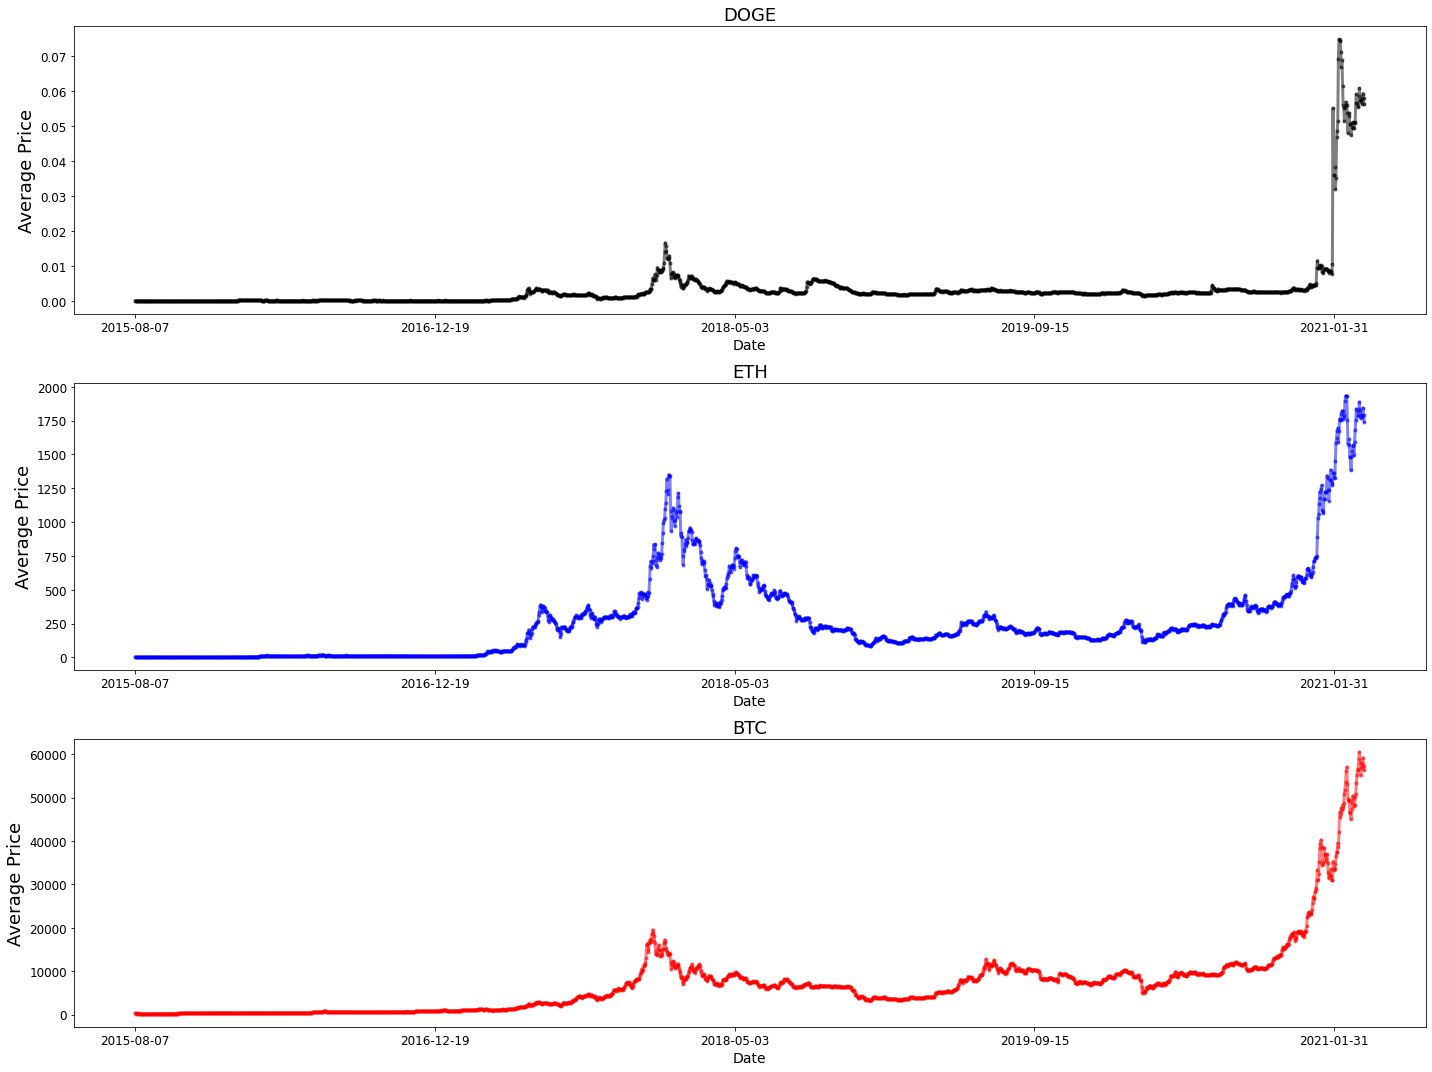

In [21]:
fig, axes = plt.subplots(nrow, ncol)

for r in range(nrow):
  plt.title(names_list[r])
  df_list[r].groupby('Date')['Average Price'].mean().plot(ax=axes[r],marker='o',ls='-',lw=3,ms=3,mew=1,alpha=.5, figsize=(20, 15),fontsize = 12,color =['black','blue','red'][r]);
  axes[r].set_xlabel('Date',fontsize = 14)
  axes[r].set_ylabel('Average Price',fontsize = 18)
  axes[r].set_title(names_list[r],fontsize = 18)
plt.tight_layout()
plt.show

When the average changes in prices by date of this three-coin are examined, a pattern can be figured out. It can be said that, when the average price of one of them increases, the average price of others increases.

### Historical Volumes

<function matplotlib.pyplot.show(*args, **kw)>

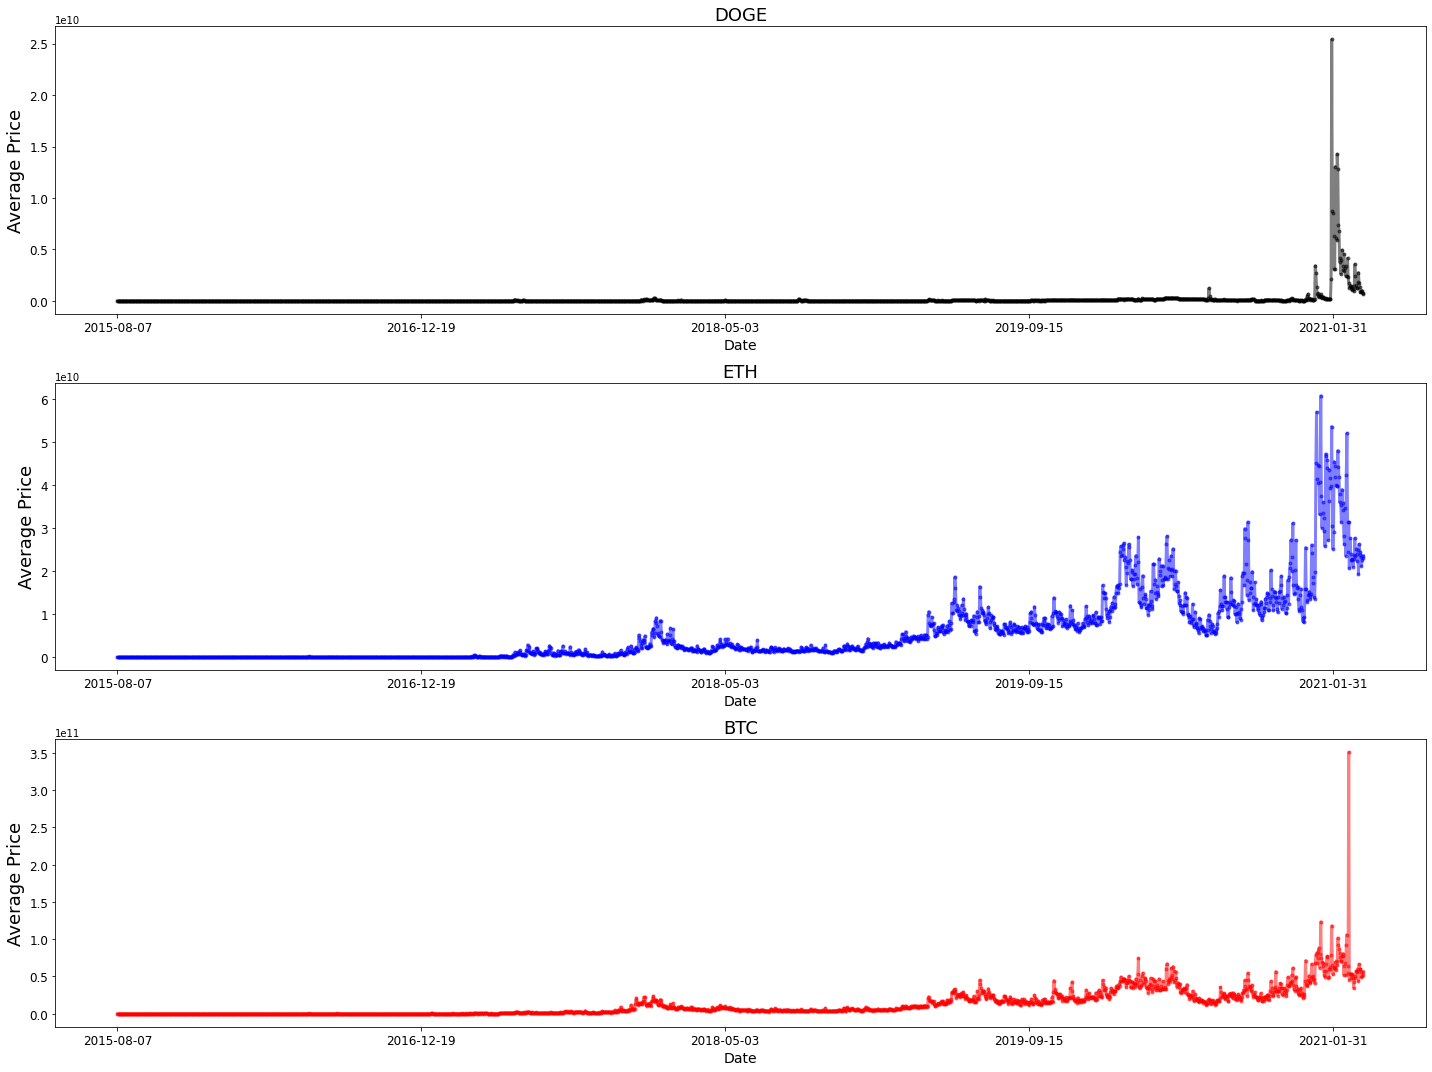

In [22]:

fig, axes = plt.subplots(nrow, ncol)

for r in range(nrow):
  plt.title(names_list[r])
  df_list[r].groupby('Date')['Volume'].mean().plot(ax=axes[r],marker='o',ls='-',lw=3,ms=3,mew=1,alpha=.5, figsize=(20, 15),fontsize = 12,color =['black','blue','red'][r]);
  axes[r].set_xlabel('Date',fontsize = 14)
  axes[r].set_ylabel('Average Price',fontsize = 18)
  axes[r].set_title(names_list[r],fontsize = 18)
plt.tight_layout()
plt.show

There can be a correlation between them but it is not certain because it is a heteroscedasticity problem, and there can be other factors that cause this change.

###Correlation of Average Price


In [23]:
df_ave = pd.DataFrame()

for r in range(len(names_list)):
  name = names_list[r] + ' Average'
  df_ave[name] = df_list[r]['Average Price']
df_ave.head()

,DOGE Average,ETH Average,BTC Average
Date,,,
2015-08-07,0.000169,3.028865,278.378997
2015-08-08,0.000164,1.756768,270.319000
2015-08-09,0.000160,0.754501,263.735489
2015-08-10,0.000161,0.683200,264.814010
2015-08-11,0.000162,0.897323,267.239990


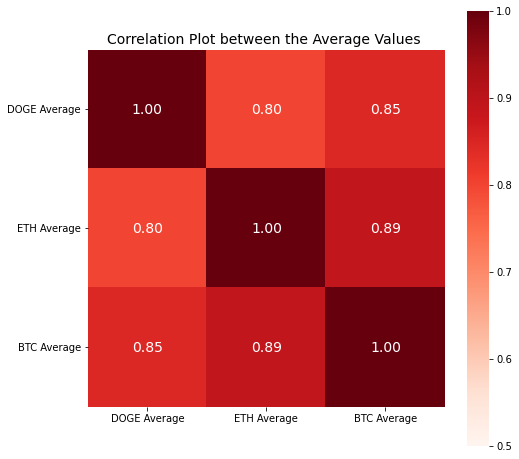

In [24]:
corr = df_ave.corr()

plt.figure(figsize=(8, 8))
map = sns.heatmap(corr,vmin=0.5,vmax=1,annot = True, fmt='.2f',
                  square = True,annot_kws={'color':'white','fontsize':14},cmap='Reds')
plt.title( 'Correlation Plot between the Average Values ',fontsize = 14)
plt.yticks(rotation=0)
plt.show()

The heatmap shows that the 3 cryptocurrencies have a strong correlation in terms of average values with each other.

###Historical Daily Return of Three Cryptocurrencies

<ipython-input-25-3e00c1721ad7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Daily Return'] = dataframe['Close'].pct_change()


<function matplotlib.pyplot.show(*args, **kw)>

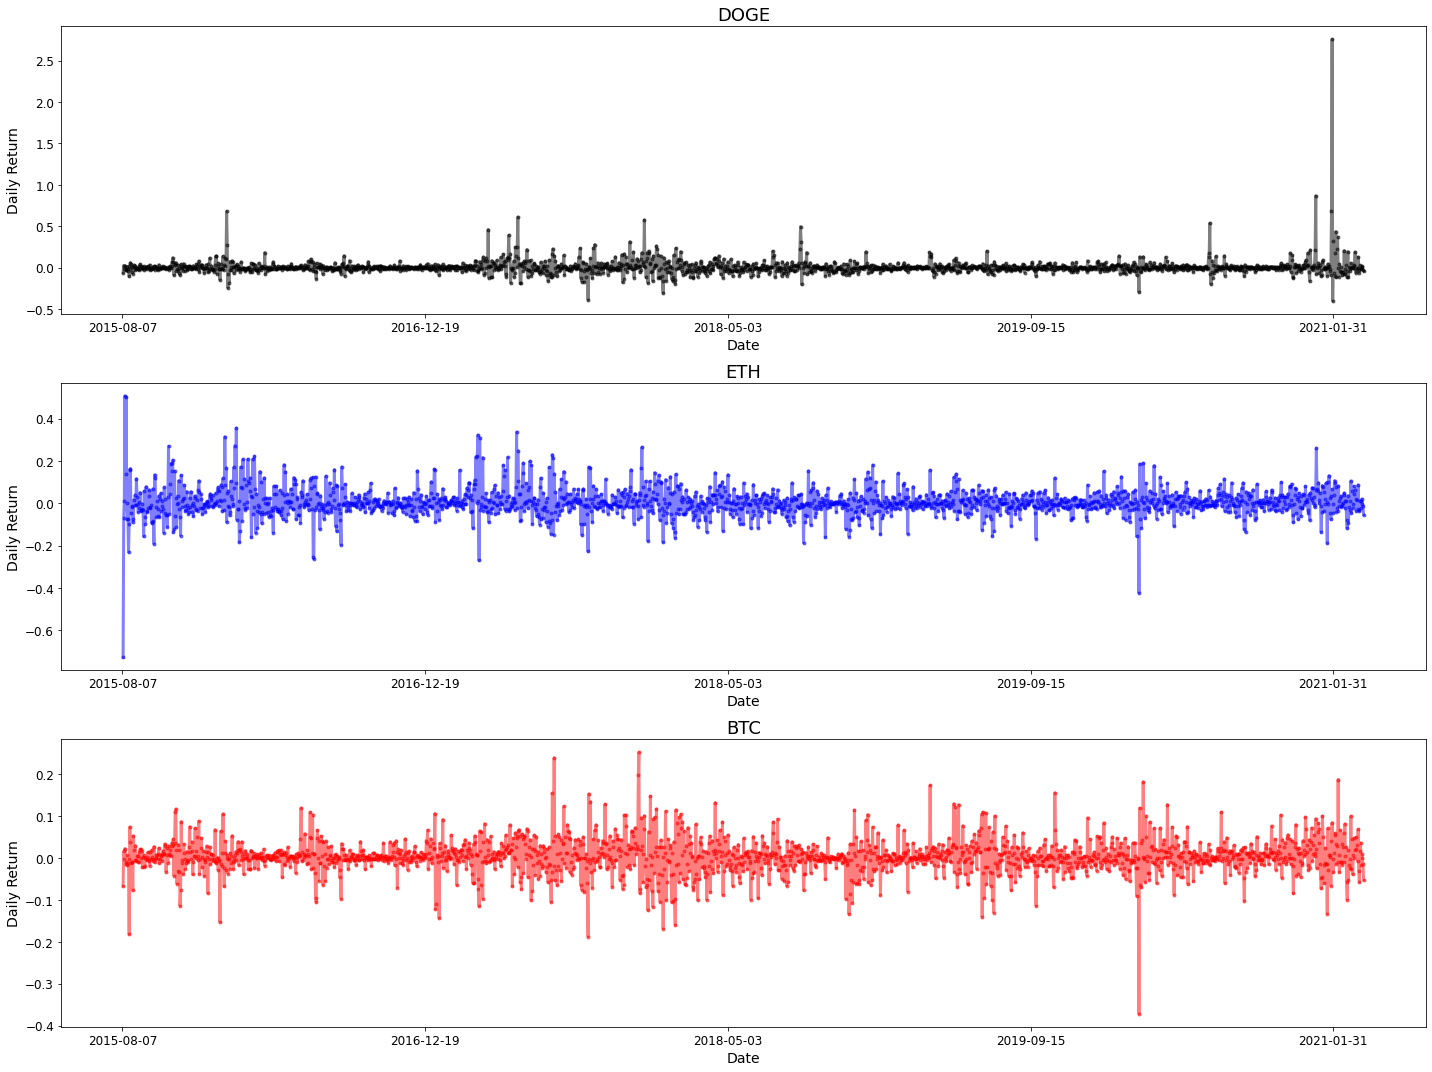

In [25]:

for dataframe in df_list: # Calculating the percentage Daily Return for all coins
  dataframe['Daily Return'] = dataframe['Close'].pct_change()

fig, axes = plt.subplots(nrow, ncol)

for r in range(nrow):
  plt.title(names_list[r])
  df_list[r].groupby('Date')['Daily Return'].mean().plot(ax=axes[r],marker='o',ls='-',lw=3,ms=3,mew=1,alpha=.5, figsize=(20, 15),fontsize = 12,color =['black','blue','red'][r]);
  axes[r].set_xlabel('Date',fontsize = 14)
  axes[r].set_ylabel('Daily Return',fontsize = 14)
  axes[r].set_title(names_list[r],fontsize = 18)
plt.tight_layout()
plt.show

###Correlation Between Daily Returns

In [26]:
df_daily = pd.DataFrame()

for r in range(len(names_list)):
  name = names_list[r] + ' Daily Return'
  df_daily[name] = df_list[r]['Daily Return']
df_daily.head()

,DOGE Daily Return,ETH Daily Return,BTC Daily Return
Date,,,
2015-08-07,NaN,NaN,NaN
2015-08-08,-0.059524,-0.728249,-0.066484
2015-08-09,0.025316,-0.068268,0.015655
2015-08-10,-0.012346,0.009333,-0.002313
2015-08-11,0.025000,0.507323,0.022369


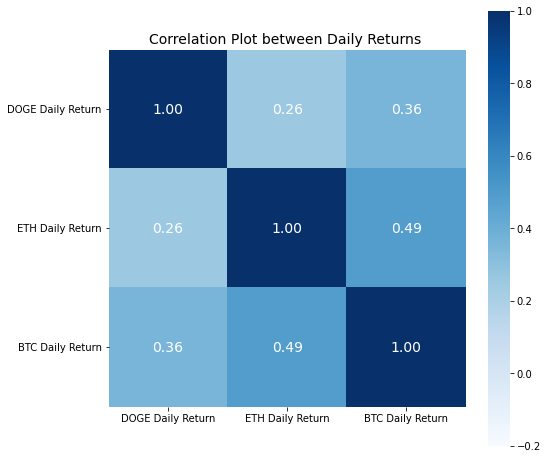

In [27]:
corr = df_daily.corr()

plt.figure(figsize=(8, 8))
map = sns.heatmap(corr,vmin=-0.2,vmax=1,annot = True, fmt='.2f',
                  square = True,annot_kws={'color':'white','fontsize':14},cmap='Blues')
plt.title( 'Correlation Plot between Daily Returns ',fontsize = 14)
plt.yticks(rotation=0)
plt.show()

The heatmap shows that the daily return of 3 cryptocurrencies have no strong correlation with each other. The most important thing is value of correlation between ETH Daily Return and BTC Daily Return which is 0.49 in this map.  

### Inspecting Last 30 Days (February 22 - March 22)

In [28]:
df_topDOGE=new_dataDOGE.tail(30)
df_topETH=new_dataETH.tail(30)
df_topBTC=new_dataBTC.tail(30)


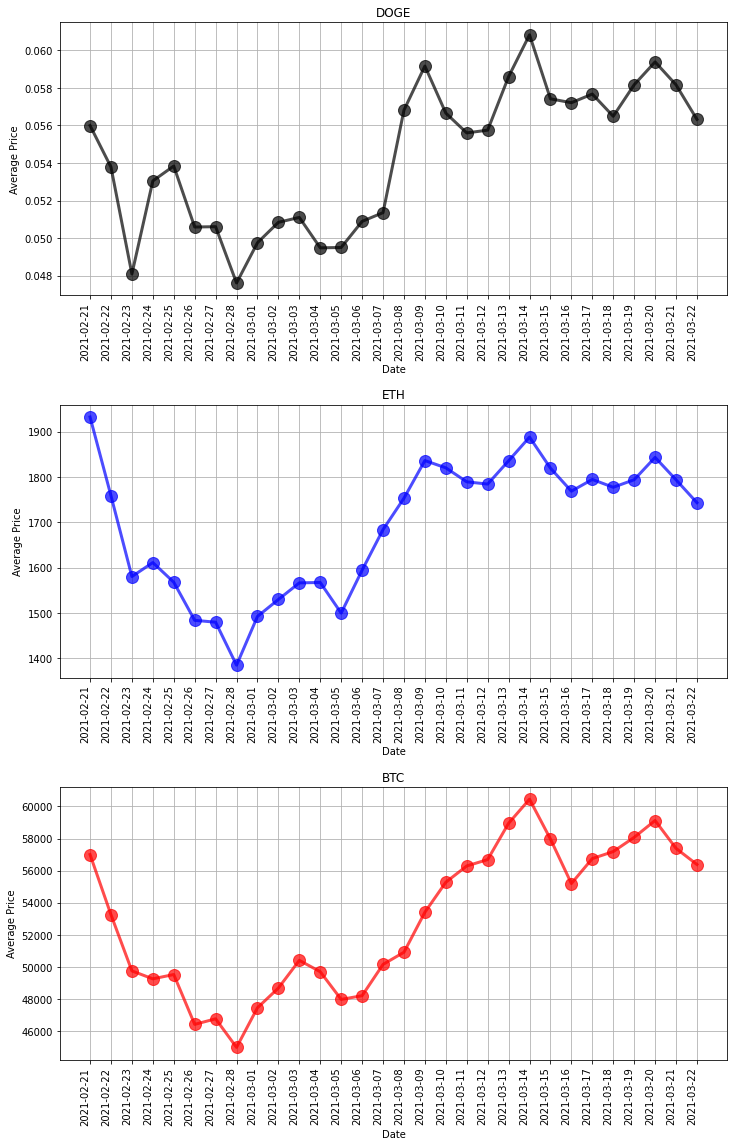

In [29]:
nrow=3
ncol=1
df_list_top = [df_topDOGE, df_topETH, df_topBTC]
fig, axes = plt.subplots(nrow, ncol, figsize=(10, 15))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)


for r in range(nrow):
  axes[r].plot(df_list_top[r].index,df_list_top[r]["Average Price"],marker='o',ls='-',lw=3,ms=12,mew=1,alpha=.7,color =['black','blue','red'][r])
  axes[r].set_xticklabels(df_list_top[r].index, rotation=90, ha='right')
  axes[r].grid()
  axes[r].set_xlabel('Date')
  axes[r].set_ylabel('Average Price')
  axes[r].set_title(names_list[r])




Change in average price in last 30 days for each coin is analyzed in this part. Average prices of ETH and BTC are not consistent, they have large amount of value and it can cause huge loss for investors. However, the average prices of dogecoin in the last 30 days have very small values and steady values according to prices of ETH and BTC in the range of prices.

## Now Take a Look At Musk's Tweets Dataset

In [35]:
fname = "2021.csv"
df_tweets = pd.read_csv(fname)[["date","tweet","hashtags","likes_count","replies_count","retweets_count"]]
df_tweets = df_tweets[(df_tweets['date'] >= '2015-08-07') & (df_tweets['date'] <= '2022-03-05')]
df_tweets.head()

,date,tweet,hashtags,likes_count,replies_count,retweets_count
0,2021-12-31,@roshanpateI 🤣 $7,[],13468,793,364
1,2021-12-31,@tesla_raj Many UI improvements coming,[],12209,1008,435
2,2021-12-31,@CSmithson80 @heydave7 @BLKMDL3 @mims This cha...,[],2529,240,143
3,2021-12-30,@BLKMDL3 @mims Predicting macroeconomics is ch...,[],5756,709,1235
4,2021-12-30,"@mims If history is any guide, not many will m...",[],5247,370,549


In [36]:
#Cleaning Clock/Minute/Second details in date
df_tweets["date"] = pd.to_datetime(df_tweets['date']).dt.date

# removing Nan values from DOGE-USD.csv
print("The shape before removal:", df_tweets.shape)
df_tweets = df_tweets.dropna(axis = 0, how ='any') 
print("The shape after removal:", df_tweets.shape)

The shape before removal: (3115, 6)
The shape after removal: (3115, 6)


Now we make changes in our tweet dataset:

* First we minimize dataset, decreasing rows to the unique format meaning that each row will represent one day. 

* And we will combine all tweets posted on the same day into one list.

* Thus there will be columns to be added to dataset: 

  1.  **tweets:** List of tweets posted on that day. (List of Strings) 
  2.   **tweet_count:** Number of tweets posted on that day. (Integer)
  3.   **nlikes:** Total number of likes of tweets posted on that day. (Integer)
  4.   **nreplies:** Total number of replies of tweets posted on that day. (Integer)
  5.   **nretweets:** Total number of retweets of tweets posted on that day. (Integer)



In [38]:
def countTweets(row):
  return len(row[1])

date_grouped_tweets_df = df_tweets.groupby("date",sort=False)
tweet_grouped_df = date_grouped_tweets_df["tweet"].apply(list).reset_index()

counts_df = date_grouped_tweets_df[["likes_count","replies_count","retweets_count"]].sum()
counts_df.reset_index()


df_tweets = pd.merge(tweet_grouped_df, counts_df, on="date")
df_tweets = df_tweets.rename(columns = {"tweet":"tweets"})
df_tweets["tweet_count"] = df_tweets.apply(countTweets,axis=1)

In [ ]:
df_tweets.head()

,date,tweets,nlikes,nreplies,nretweets,tweet_count
0,2021-03-21,[@NASASpaceflight Hopefully will happen this d...,221671,13940,15449,11
1,2021-03-20,[@Erdayastronaut @Twitter @TwitterComms @verif...,444302,13499,27735,6
2,2021-03-19,"[@Teslarati Преступленіе и наказаніе, @MarcusH...",481727,14918,28360,11
3,2021-03-18,[@tobyliiiiiiiiii We will need launch tower fo...,578562,19712,33450,7
4,2021-03-17,[@Rjdlandscapes @Erdayastronaut @SpaceX That’s...,80488,5385,5209,3


## Observing the top 5 days with most number of tweets posted and retweets made

In [40]:
daysWithMaxTweets = df_tweets.sort_values("tweet_count",ascending=False).head(5)
daysWithMaxRetweets = df_tweets.sort_values("retweets_count",ascending=False).head(5)

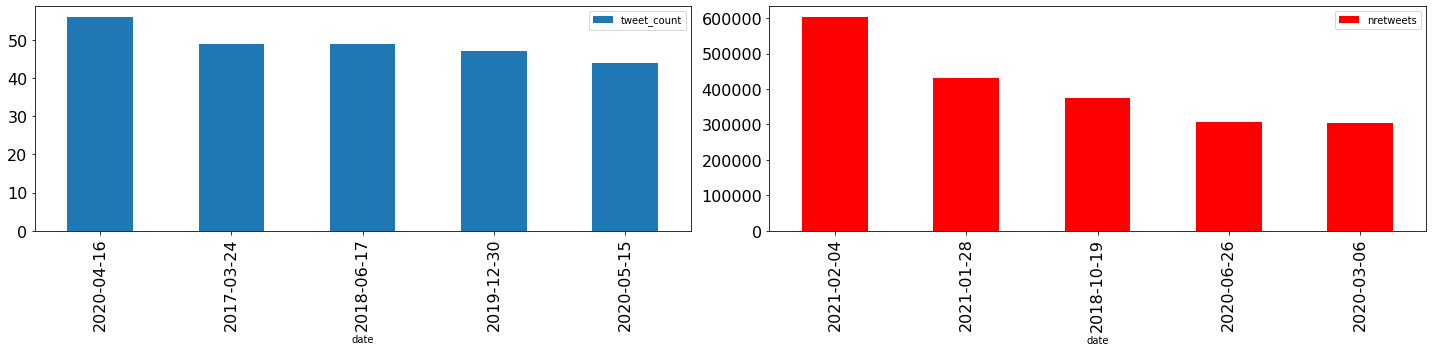

In [ ]:
nrow=1
ncol=2

fig, axes = plt.subplots(nrow, ncol, figsize=(20,5))
daysWithMaxTweets.plot.bar(x="date", y="tweet_count",ax=axes[0], fontsize=16)
daysWithMaxRetweets.plot.bar(x="date", y="nretweets",ax=axes[1], color="red", fontsize=16, )

fig.tight_layout()



Lets Combine Everything in one DataFrame

In [41]:
df_tweets.head()

,date,tweets,likes_count,replies_count,retweets_count,tweet_count
0,2021-12-31,"[@roshanpateI 🤣 $7, @tesla_raj Many UI improve...",28206,2041,942,3
1,2021-12-30,[@BLKMDL3 @mims Predicting macroeconomics is c...,760969,38543,93072,7
2,2021-12-29,"[@PPathole I do, @GailAlfarATX @SawyerMerritt ...",135432,13648,9888,7
3,2021-12-28,[@cleantechnica Most people still have no idea...,10687,1047,875,1
4,2021-12-27,"[@SpaceXMR 🤣, @engineers_feed The resolution o...",275323,22232,18269,9


In [42]:
df_DOGE_with_dailyReturn = df_list[0]
df_ETH_with_dailyReturn = df_list[1]
df_BTC_with_dailyReturn = df_list[2]

In [43]:
df_DOGE_with_dailyReturn.head()

,Open,High,Low,Close,Volume,Average Price,Daily Return
Date,,,,,,,
2015-08-07,0.000168,0.000172,0.000165,0.000168,100492.0,0.000169,NaN
2015-08-08,0.000169,0.000171,0.000158,0.000158,145228.0,0.000164,-0.059524
2015-08-09,0.000158,0.000163,0.000156,0.000162,106400.0,0.000160,0.025316
2015-08-10,0.000162,0.000164,0.000158,0.000160,68112.0,0.000161,-0.012346
2015-08-11,0.000160,0.000164,0.000160,0.000164,121884.0,0.000162,0.025000


In [44]:
df_ETH_with_dailyReturn.head()

,Open,High,Low,Close,Adj Close,Volume,Average Price,Daily Return
Date,,,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0,3.028865,NaN
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0,1.756768,-0.728249
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0,0.754501,-0.068268
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0,0.683200,0.009333
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0,0.897323,0.507323


In [45]:
df_BTC_with_dailyReturn.head()

,Open,High,Low,Close,Adj Close,Volume,Average Price,Daily Return
Date,,,,,,,,
2015-08-07,278.740997,280.391998,276.365997,279.584991,279.584991,42484800.0,278.378997,NaN
2015-08-08,279.742004,279.928009,260.709991,260.997009,260.997009,58533000.0,270.319000,-0.066484
2015-08-09,261.115997,267.002991,260.467987,265.083008,265.083008,23789600.0,263.735489,0.015655
2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,20979400.0,264.814010,-0.002313
2015-08-11,264.342010,270.385986,264.093994,270.385986,270.385986,25433900.0,267.239990,0.022369


In [46]:
for i in range(len(df_list)):
  df_list[i] = df_list[i].rename(columns={"Open":"Open_"+names_list[i]})
  df_list[i] = df_list[i].rename(columns={"High":"High_"+names_list[i]})
  df_list[i] = df_list[i].rename(columns={"Low":"Low_"+names_list[i]})
  df_list[i] = df_list[i].rename(columns={"Close":"Close_"+names_list[i]})
  df_list[i] = df_list[i].rename(columns={"Volume":"Volume_"+names_list[i]})
  df_list[i] = df_list[i].rename(columns={"Average Price":"Average Price_"+names_list[i]})
  df_list[i] = df_list[i].rename(columns={"Daily Return":"Daily Return_"+names_list[i]})

In [47]:
# merge all 3 coin dataframe into one dataframe
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='inner'), df_list)
df_merged = df_merged.dropna()
df_merged = df_merged.reset_index()

In [48]:
df_merged.head()

,Date,Open_DOGE,High_DOGE,Low_DOGE,Close_DOGE,Volume_DOGE,Average Price_DOGE,Daily Return_DOGE,Open_ETH,High_ETH,...,Average Price_ETH,Daily Return_ETH,Open_BTC,High_BTC,Low_BTC,Close_BTC,Adj Close_y,Volume_BTC,Average Price_BTC,Daily Return_BTC
0,2015-08-08,0.000169,0.000171,0.000158,0.000158,145228.0,0.000164,-0.059524,2.793760,2.798810,...,1.756768,-0.728249,279.742004,279.928009,260.709991,260.997009,260.997009,58533000.0,270.319000,-0.066484
1,2015-08-09,0.000158,0.000163,0.000156,0.000162,106400.0,0.000160,0.025316,0.706136,0.879810,...,0.754501,-0.068268,261.115997,267.002991,260.467987,265.083008,265.083008,23789600.0,263.735489,0.015655
2,2015-08-10,0.000162,0.000164,0.000158,0.000160,68112.0,0.000161,-0.012346,0.713989,0.729854,...,0.683200,0.009333,265.477997,267.032013,262.596008,264.470001,264.470001,20979400.0,264.814010,-0.002313
3,2015-08-11,0.000160,0.000164,0.000160,0.000164,121884.0,0.000162,0.025000,0.708087,1.131410,...,0.897323,0.507323,264.342010,270.385986,264.093994,270.385986,270.385986,25433900.0,267.239990,0.022369
4,2015-08-12,0.000164,0.000166,0.000158,0.000160,68514.0,0.000162,-0.024390,1.058750,1.289940,...,1.086774,0.140075,270.597992,270.673004,265.468994,266.376007,266.376007,26815400.0,268.070999,-0.014831


In [49]:
df_tweets = df_tweets.rename(columns={"date":"Date"})
df_tweets = df_tweets.iloc[::-1]

In [50]:
df_tweets.head()

,Date,tweets,likes_count,replies_count,retweets_count,tweet_count
350,2021-01-01,"[@PPathole Dojo isn’t needed, but will make se...",3523,221,213,1
349,2021-01-02,"[@Gfilche 😉, @flcnhvy Tesla is responsible for...",197234,7415,9972,5
348,2021-01-03,[@RGVaerialphotos @SpaceX Yes],17991,464,409,1
347,2021-01-05,[@Dtrford @austinbarnard45 @AlexSvanArt @ErcXs...,205328,5091,7832,3
346,2021-01-07,"[@ashleevance True, @ID_AA_Carmack I hope so. ...",1610918,41626,144966,14


In [51]:
#in order to merge tweets and coins dataframes, convert the Date column type to string type
df_tweets["Date"] = df_tweets["Date"].astype(str)
df_merged["Date"] = df_merged["Date"].astype(str)

In [52]:
# merge on DATE column
print("3Coin Dataframe has shape:", df_merged.shape)
print("Tweets Dataframe has shape:", df_tweets.shape)

df_merged2 = result = pd.merge(df_merged,df_tweets, on="Date",how="left")

print("\nAll merged Dataframe has shape:", df_merged2.shape)

3Coin Dataframe has shape: (2050, 24)
Tweets Dataframe has shape: (351, 6)

All merged Dataframe has shape: (2050, 29)


In [53]:
df_merged2

,Date,Open_DOGE,High_DOGE,Low_DOGE,Close_DOGE,Volume_DOGE,Average Price_DOGE,Daily Return_DOGE,Open_ETH,High_ETH,...,Close_BTC,Adj Close_y,Volume_BTC,Average Price_BTC,Daily Return_BTC,tweets,likes_count,replies_count,retweets_count,tweet_count
0,2015-08-08,0.000169,0.000171,0.000158,0.000158,1.452280e+05,0.000164,-0.059524,2.793760,2.798810,...,260.997009,260.997009,5.853300e+07,270.319000,-0.066484,NaN,NaN,NaN,NaN,NaN
1,2015-08-09,0.000158,0.000163,0.000156,0.000162,1.064000e+05,0.000160,0.025316,0.706136,0.879810,...,265.083008,265.083008,2.378960e+07,263.735489,0.015655,NaN,NaN,NaN,NaN,NaN
2,2015-08-10,0.000162,0.000164,0.000158,0.000160,6.811200e+04,0.000161,-0.012346,0.713989,0.729854,...,264.470001,264.470001,2.097940e+07,264.814010,-0.002313,NaN,NaN,NaN,NaN,NaN
3,2015-08-11,0.000160,0.000164,0.000160,0.000164,1.218840e+05,0.000162,0.025000,0.708087,1.131410,...,270.385986,270.385986,2.543390e+07,267.239990,0.022369,NaN,NaN,NaN,NaN,NaN
4,2015-08-12,0.000164,0.000166,0.000158,0.000160,6.851400e+04,0.000162,-0.024390,1.058750,1.289940,...,266.376007,266.376007,2.681540e+07,268.070999,-0.014831,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,2021-03-18,0.057640,0.058828,0.054143,0.057383,9.097774e+08,0.056485,-0.004683,1823.158447,1848.646118,...,57858.921875,57858.921875,5.574604e+10,57184.914062,-0.017190,[The simulation really struggled to make this ...,377605.0,13609.0,17954.0,2.0
2046,2021-03-19,0.057377,0.059721,0.056604,0.058328,9.647478e+08,0.058163,0.016468,1782.568726,1841.196045,...,58346.652344,58346.652344,4.906387e+10,58071.039062,0.008430,"[@MarcusHouse The [ahem] reach-around, @Ration...",768022.0,22576.0,44192.0,15.0
2047,2021-03-20,0.058315,0.060639,0.058120,0.058961,1.012934e+09,0.059380,0.010852,1817.522705,1874.708984,...,58313.644531,58313.644531,5.036173e+10,59122.291015,-0.000566,[@Erdayastronaut @Twitter @TwitterComms @verif...,456534.0,14002.0,27751.0,7.0
2048,2021-03-21,0.058970,0.059521,0.056798,0.057234,7.595930e+08,0.058160,-0.029291,1812.606567,1823.353027,...,57523.421875,57523.421875,5.194341e+10,57386.757813,-0.013551,"[@newscientist True, @cleantechnica I am accum...",214385.0,12975.0,14138.0,10.0


In [55]:
values = {"tweets":"-", "likes_count":0,	"replies_count":0,	"retweets_count":0,	"tweet_count":0}
df_merged2 = df_merged2.fillna(value=values)

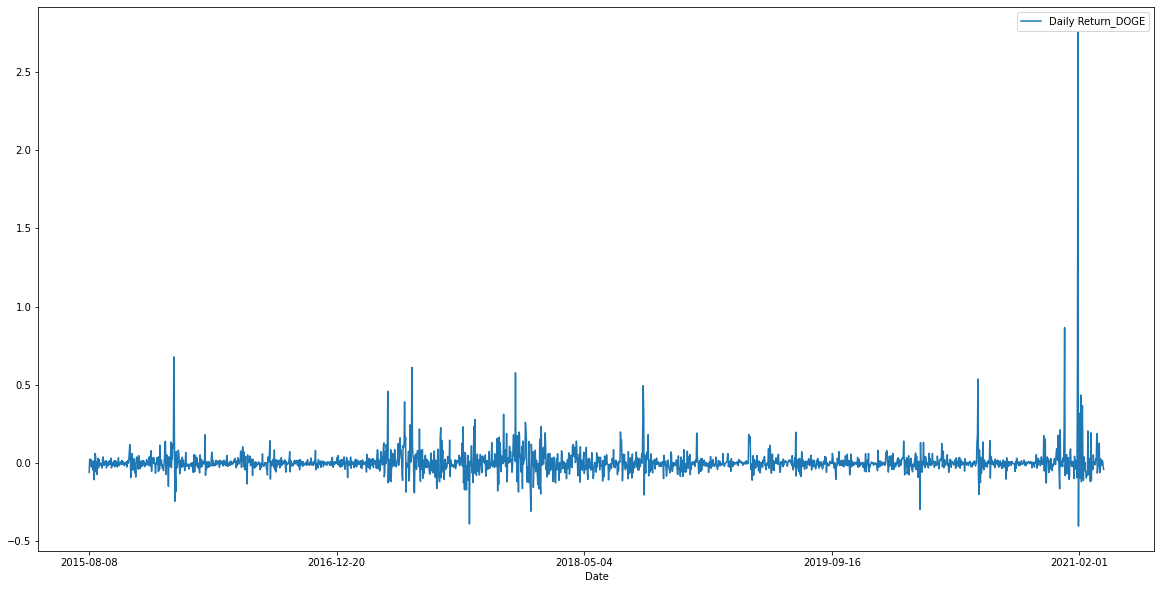

In [56]:
ax = df_merged2.plot(x="Date", y="Daily Return_DOGE", figsize=(20,10))

The table below shows that there are ***123*** many days for which DogeCoin's daily return was changed more than ***10%***.

We will examine these days under our research concept which was the inspecting the effect of Musk's tweets on DogeCoin values.

We label each day if there is a tweet posted by Elon Mush and if Daily Return is higher than our `threshold which is %10 as we set`

In [57]:
# lets label these days as affected
def labelDays(row, threshold):
  if abs(row[7]) >= threshold and row[-6] != "-":
    row["Effected"] = True
  else:
    row["Effected"] = False
  return row

In [58]:
df_merged2 = df_merged2.apply(labelDays, threshold = 0.1, axis=1)

In [59]:
df_merged2

,Date,Open_DOGE,High_DOGE,Low_DOGE,Close_DOGE,Volume_DOGE,Average Price_DOGE,Daily Return_DOGE,Open_ETH,High_ETH,...,Adj Close_y,Volume_BTC,Average Price_BTC,Daily Return_BTC,tweets,likes_count,replies_count,retweets_count,tweet_count,Effected
0,2015-08-08,0.000169,0.000171,0.000158,0.000158,1.452280e+05,0.000164,-0.059524,2.793760,2.798810,...,260.997009,5.853300e+07,270.319000,-0.066484,-,0.0,0.0,0.0,0.0,False
1,2015-08-09,0.000158,0.000163,0.000156,0.000162,1.064000e+05,0.000160,0.025316,0.706136,0.879810,...,265.083008,2.378960e+07,263.735489,0.015655,-,0.0,0.0,0.0,0.0,False
2,2015-08-10,0.000162,0.000164,0.000158,0.000160,6.811200e+04,0.000161,-0.012346,0.713989,0.729854,...,264.470001,2.097940e+07,264.814010,-0.002313,-,0.0,0.0,0.0,0.0,False
3,2015-08-11,0.000160,0.000164,0.000160,0.000164,1.218840e+05,0.000162,0.025000,0.708087,1.131410,...,270.385986,2.543390e+07,267.239990,0.022369,-,0.0,0.0,0.0,0.0,False
4,2015-08-12,0.000164,0.000166,0.000158,0.000160,6.851400e+04,0.000162,-0.024390,1.058750,1.289940,...,266.376007,2.681540e+07,268.070999,-0.014831,-,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,2021-03-18,0.057640,0.058828,0.054143,0.057383,9.097774e+08,0.056485,-0.004683,1823.158447,1848.646118,...,57858.921875,5.574604e+10,57184.914062,-0.017190,[The simulation really struggled to make this ...,377605.0,13609.0,17954.0,2.0,False
2046,2021-03-19,0.057377,0.059721,0.056604,0.058328,9.647478e+08,0.058163,0.016468,1782.568726,1841.196045,...,58346.652344,4.906387e+10,58071.039062,0.008430,"[@MarcusHouse The [ahem] reach-around, @Ration...",768022.0,22576.0,44192.0,15.0,False
2047,2021-03-20,0.058315,0.060639,0.058120,0.058961,1.012934e+09,0.059380,0.010852,1817.522705,1874.708984,...,58313.644531,5.036173e+10,59122.291015,-0.000566,[@Erdayastronaut @Twitter @TwitterComms @verif...,456534.0,14002.0,27751.0,7.0,False
2048,2021-03-21,0.058970,0.059521,0.056798,0.057234,7.595930e+08,0.058160,-0.029291,1812.606567,1823.353027,...,57523.421875,5.194341e+10,57386.757813,-0.013551,"[@newscientist True, @cleantechnica I am accum...",214385.0,12975.0,14138.0,10.0,False


### The table below shows us that there are 123 many days in which DOGE coin is affected by Musk's tweets.

In [60]:
effected_days = df_merged2[df_merged2["Effected"]==True]
effected_days

,Date,Open_DOGE,High_DOGE,Low_DOGE,Close_DOGE,Volume_DOGE,Average Price_DOGE,Daily Return_DOGE,Open_ETH,High_ETH,...,Adj Close_y,Volume_BTC,Average Price_BTC,Daily Return_BTC,tweets,likes_count,replies_count,retweets_count,tweet_count,Effected
10,2015-08-18,0.000150,0.000150,0.000134,0.000134,8.843900e+04,0.000142,-0.106667,1.215300,1.331160,...,211.078995,4.214720e+07,234.536003,-0.181788,-,0.0,0.0,0.0,0.0,True
82,2015-10-29,0.000126,0.000141,0.000124,0.000141,1.946440e+05,0.000133,0.119048,1.005250,1.206660,...,313.855011,6.449590e+07,309.996506,0.030323,-,0.0,0.0,0.0,0.0,True
143,2015-12-29,0.000139,0.000155,0.000138,0.000155,1.049670e+05,0.000146,0.115108,0.843835,0.873054,...,432.983002,5.159650e+07,426.805008,0.025348,-,0.0,0.0,0.0,0.0,True
153,2016-01-08,0.000140,0.000158,0.000138,0.000158,3.067160e+05,0.000148,0.136691,0.942752,0.991825,...,453.230011,5.699300e+07,455.435989,-0.010519,-,0.0,0.0,0.0,0.0,True
154,2016-01-09,0.000173,0.000202,0.000169,0.000180,1.201210e+06,0.000186,0.139241,0.985501,0.992345,...,447.610992,3.227800e+07,450.764512,-0.012398,-,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,2021-02-23,0.053698,0.053768,0.042410,0.047392,2.394345e+09,0.048089,-0.117878,1781.409058,1781.409058,...,48824.425781,1.061025e+11,49747.759766,-0.099302,"[@AskDrStupid Just a Surface Detail, @ErcXspac...",495100.0,25239.0,25035.0,12.0,True
2023,2021-02-24,0.047414,0.059873,0.046216,0.056555,4.148512e+09,0.053045,0.193345,1571.476440,1710.983765,...,49705.332031,6.369552e+10,49251.818360,0.018042,"[@VitoTheGreat_ I love dogs &amp; memes, On th...",829652.0,31108.0,83531.0,12.0,True
2024,2021-02-25,0.056615,0.057808,0.049869,0.050167,2.356982e+09,0.053838,-0.112952,1625.393921,1670.224121,...,47093.851563,5.450657e+10,49521.410157,-0.052539,[@Rjdlandscapes @Tesla Prices in the US (of al...,1304924.0,49447.0,78623.0,11.0,True
2035,2021-03-08,0.052123,0.061949,0.051672,0.061949,3.554151e+09,0.056810,0.188538,1724.229248,1835.192139,...,52246.523438,4.859743e+10,50910.062500,0.020307,"[Starbase, Texas https://t.co/mt4IpqqmjF, @Ha...",979683.0,30300.0,54439.0,7.0,True


In [61]:
df_all_tweets = pd.DataFrame()
for index,row in df_tweets.iterrows():
  myTweets = row[1]
  if row[0] in list(effected_days.Date):  
    for tweet in myTweets:
      df_all_tweets= df_all_tweets.append({"tweet":tweet, "affected":True},ignore_index=True)

  else:
    for tweet in myTweets:
      df_all_tweets= df_all_tweets.append({"tweet":tweet, "affected":False},ignore_index=True)


## **These are the tweets that have been sent on the day in which DOGE's value has been changed more than our threshold.**

In [62]:
df_all_tweets[df_all_tweets["affected"]==True]

,tweet,affected
0,"@PPathole Dojo isn’t needed, but will make sel...",1.0
1,@Gfilche 😉,1.0
2,@flcnhvy Tesla is responsible for 2/3 of all t...,1.0
3,So proud of the Tesla team for achieving this ...,1.0
4,"@newscientist Um, we have giant fusion reactor...",1.0
...,...,...
519,@itsALLrisky Yes!,1.0
520,@TSLAgang @SpinelessModer1 Yes,1.0
521,@ashleevance For sure wise for elderly or immu...,1.0
522,FSD Beta has now been expanded to ~2000 owners...,1.0


# HYPOTHESIS TESTING

**Hypothesis:  1**                                                                 
**Null Hypothesis:** BTC price changes does not affect Dogecoin price.

**Alternative Hypothesis:**Change in BTC price affect Dogecoin price.

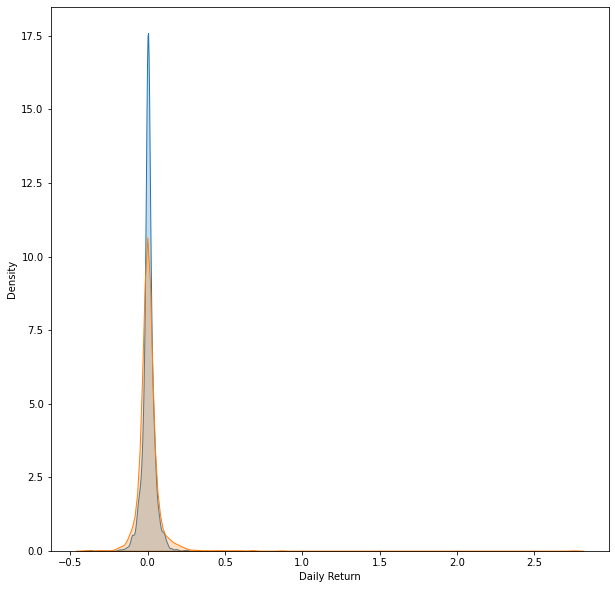

In [63]:
btc_test = new_dataBTC['Daily Return']
doge_test = new_dataDOGE['Daily Return']
fig, ax = plt.subplots(1,1, figsize=(10,10))

sns.kdeplot(btc_test, shade=True, ax=ax, label="BTC")
sns.kdeplot(doge_test, shade=True, ax=ax, label="DOGE")

plt.show()

In [64]:
from scipy import stats

In [65]:
signifance=0.05
btc_test = btc_test.between(-1,3)
doge_test = doge_test.between(-1,3)

_, p_value = stats.f_oneway(btc_test, doge_test)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)

if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, BTC price changes effect Dogecoin.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, BTC price changes does not effect Dogecoin.")

P value:  1.00E+00
Signifance Level: 0.05
Based on current value of p value we fail to reject null hypothesis, BTC price changes does not effect Dogecoin.


**Hypothesis:  2**                                                                        


**Null Hypothesis:** ETH price changes does not affect Dogecoin price.

**Alternative Hypothesis:**Change in ETH price affect Dogecoin price.

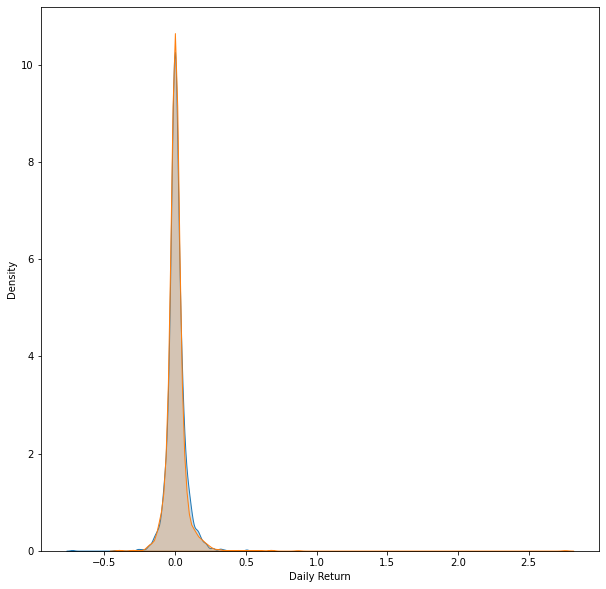

In [66]:
eth_test = new_dataETH['Daily Return']
doge_test = new_dataDOGE['Daily Return']
fig, ax = plt.subplots(1,1, figsize=(10,10))

sns.kdeplot(eth_test, shade=True, ax=ax, label="ETH")
sns.kdeplot(doge_test, shade=True, ax=ax, label="DOGE")

plt.show()

In [67]:
signifance=0.05
eth_test = eth_test.between(-1,3)
doge_test = doge_test.between(-1,3)

_, p_value = stats.f_oneway(eth_test, doge_test)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)

if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, ETH price changes effect Dogecoin.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, ETH price changes does not effect Dogecoin.")

P value:  1.00E+00
Signifance Level: 0.05
Based on current value of p value we fail to reject null hypothesis, ETH price changes does not effect Dogecoin.


# MACHINE LEARNING

We split the data to train, validation and test datasets. The data have been seperated accordingly, %80 for train data, %10 for test data and %10 for validation. Our control columns consists Daily Returns of BTC, ETH and DOGE. According to their values it checks the Effected label.

In [68]:
from sklearn.model_selection import train_test_split


X = df_merged2.filter(like = "Daily Return");
Y = df_merged2['Effected']

X_train, X_remaining, y_train, y_remaining = train_test_split(X, Y, test_size=0.20, random_state=10)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=10)
X.head()

,Daily Return_DOGE,Daily Return_ETH,Daily Return_BTC
0,-0.059524,-0.728249,-0.066484
1,0.025316,-0.068268,0.015655
2,-0.012346,0.009333,-0.002313
3,0.025000,0.507323,0.022369
4,-0.024390,0.140075,-0.014831


Now we build our machine learning methods. We used Decision trees and Random Forests as our models. 

In [69]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

#Decision Tree Training
model_dt = tree.DecisionTreeClassifier(random_state=10) #Create decision tree classifier object
model_dt.fit(X_train, y_train) #train the classifier using the training data

#Random Forest Training(In new version default of estimators will be 100)
model_rf = RandomForestClassifier(n_estimators=100, random_state=10, class_weight='balanced')
model_rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=10)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

#Decision Tree Testing
dt_predictions_val = model_dt.predict(X_val)
dt_acc_val = accuracy_score(y_val, dt_predictions_val)

rf_predictions_val = model_rf.predict(X_val)
rf_acc_val = accuracy_score(y_val, rf_predictions_val)

print("Decision Tree Validation Accuracy:"+str(dt_acc_val))
print("Random Forest Validation Accuracy:"+str(rf_acc_val))

Decision Tree Validation Accuracy:1.0
Random Forest Validation Accuracy:1.0


Random forest validation accuracy is bigger than decision tree validation accuracy. So random forest model provide more reliable predictions. 

Confusion Matrix for our Random Forest

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


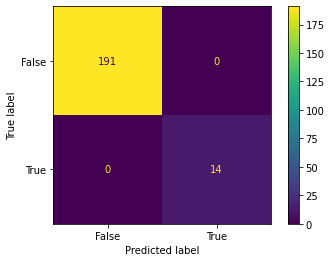

In [71]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(model_rf, X_val, y_val)
plt.show()

The number of true predictions is (matching True-True and False-False) bigger than false predictions (matching True-False and False-True). So, it can be said that our model is reliable. 

The rate of effects of Musk's tweets on DOGECoin's price is 15.8%. 

# NOW EXAMINE IF A TWEET AFFECTS DOGE COIN

In [72]:
df = df_all_tweets
df

,tweet,affected
0,"@PPathole Dojo isn’t needed, but will make sel...",1.0
1,@Gfilche 😉,1.0
2,@flcnhvy Tesla is responsible for 2/3 of all t...,1.0
3,So proud of the Tesla team for achieving this ...,1.0
4,"@newscientist Um, we have giant fusion reactor...",1.0
...,...,...
3110,https://t.co/OCUqr6xd9d,0.0
3111,https://t.co/mVhCpxVPZI,0.0
3112,@roshanpateI 🤣 $7,0.0
3113,@tesla_raj Many UI improvements coming,0.0


In [73]:
affected_size = df[df["affected"] == True].shape[0]
not_affected_size = df[df["affected"] == False].shape[0]

print("Number of effective tweets:",affected_size)
print("Number of ineffective tweets:", not_affected_size)

print("\nTotal number of tweets:", df.shape[0])

Number of effective tweets: 181
Number of ineffective tweets: 2934

Total number of tweets: 3115


### Ratio of number of tweets have been sent by Musk and which affected DOGE Coin price:

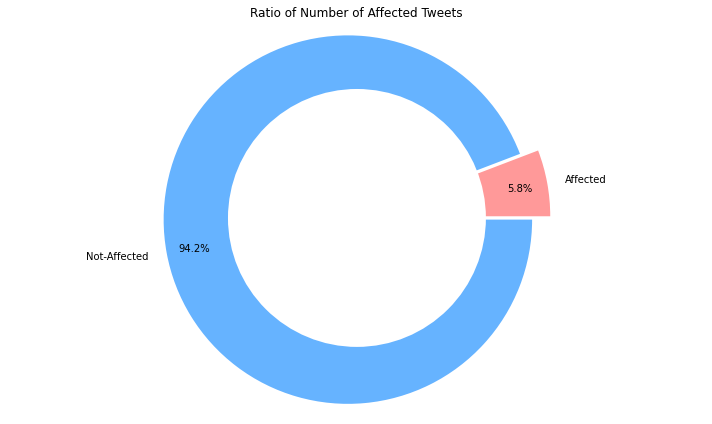

In [74]:
affected_size = df[df["affected"] == True].shape[0]*100/df.shape[0]
not_affected_size = df[df["affected"] == False].shape[0]*100/df.shape[0]

labels = "Affected", "Not-Affected"
title = "Ratio of Number of Affected Tweets"

fig1, ax1 = plt.subplots(figsize=(10,6))

explode = (0.05,0.05)
colors = ['#ff9999','#66b3ff']
sizes = [affected_size, not_affected_size]

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',pctdistance=0.85, explode = explode, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title(title)

centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()

plt.show()

Our data is unbalanced. Number of tweets that claimed to affect DOGECOIN price seems to be very less than the others.

## Tweet Preprocessing

Lets preprocess our tweets to transform text into a more suitable form for machine learning algorithms.

We will do:
* remove special characters
* remove stop words

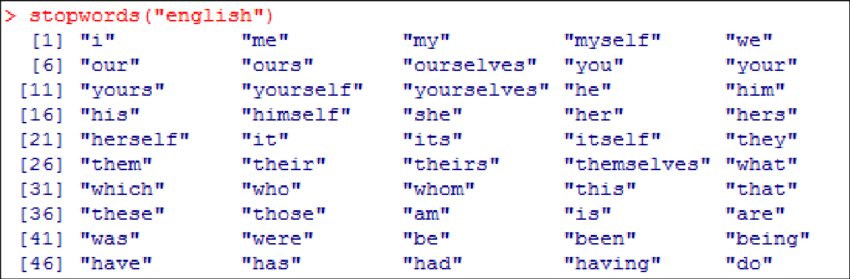

Lets make use of `nltk` library

In [75]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [76]:
def remove_non_alpha(s):
  # removing non-alphanumeric chars
  s = re.sub ('[\W]+', ' ', s.lower())

  return s

In [77]:
def remove_stop_words(s):
  return " ".join([item for item in s.split() if item not in stop])

In [78]:
df["tweet"] = df["tweet"].apply(remove_non_alpha)
df["tweet"] = df["tweet"].apply(remove_stop_words)

In [79]:
df.shape

(3115, 2)

We will use `CountVectorizer` to obtain the bag-of-words representation of the tweets.

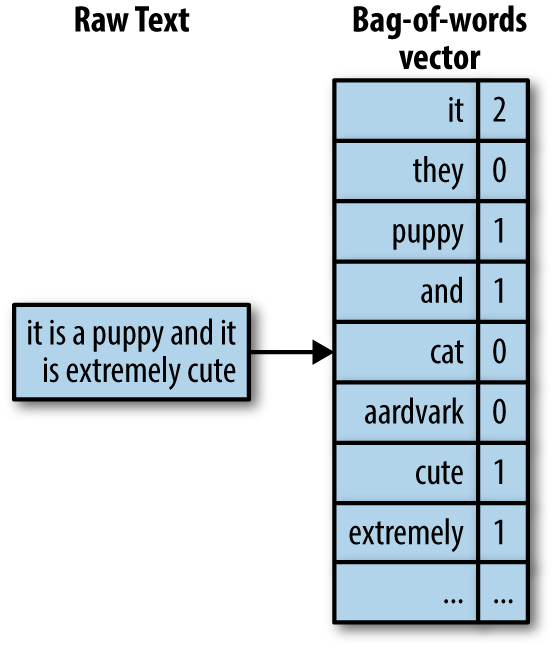

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# extracting input and output
X = vectorizer.fit_transform(df["tweet"])
y = df["affected"].values

# LOGISTIC REGRESSION
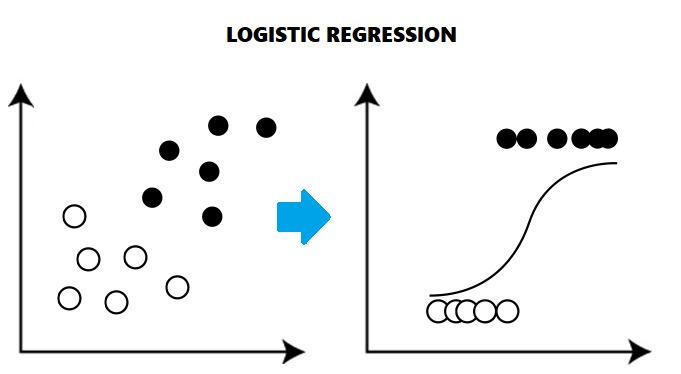


We will set `class_balance = "balanced"` to adjust weights inversely proportional to class frequencies in the input data.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(class_weight="balanced")

## Train - Test - Split our data

We will split our data into 80% train, 10% validation, %10 test

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

##Confusion Matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


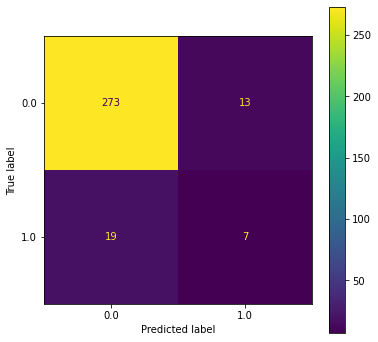

In [83]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (6,6)

plot_confusion_matrix(model, X_val, y_val)
plt.show()

In [84]:
y_preds = model.predict(X_test)

accuracy = accuracy_score(y_test, y_preds)
print("Test Accuracy: {:.2f}".format(accuracy))

Test Accuracy: 0.89


## Our Logistic Regression model works in 89% accuracy.


Which is trained on the prediction on a tweet sent by Musk that may affect DOGE prices.

# Conclusion

Various correlations between the characteristics of the dataset were analyzed in the project. Determination of which correlations to be used in ML models is in this study. It is decided to focus on the correlation between Elon Musk’s tweets and the value of Dogecoin. When tweets that include some spesific words were specified, we have small number of data. So, although Musk's tweet provide better predictions on coins' value (because of high accuracy level of models), it is not possible to say there is a certain correlation between them. The second decided thing in hypthesis testing part is change in price of ETH does not affect Dogecoin and change in price of BTC has no effect on Dogecoin because their p-value are bigger than 0.05 signifiance level. There can be other reasons for these changes. 

# Future Work

In the future, other possible reasons that affect prices of coins can be examined in advanced studies,effect of heteroscedasticity problem can be reduced with more variables . Also, the number of Musk's tweets about these coins will increase in the future, so the models are going to be more reliable because, there will be more data for analyzing.